In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## drop some less useful columns 
titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace = True)

In [7]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
## filling missing value
titanic['Age'].fillna(np.median(titanic['Age'].dropna()),inplace = True)
titanic['Embarked'].fillna(titanic['Embarked'].dropna().mode()[0],inplace = True)

In [9]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
## handling categorical variable -- one hot encoding -- sex/embarked 
## one -> male ,zero -> female
titanic['Sex'] = pd.get_dummies(titanic['Sex'],drop_first = True)
embarked_dummies = pd.get_dummies(titanic['Embarked'],drop_first = True,prefix = 'Embarked')
titanic = pd.concat([titanic, embarked_dummies],axis = 1).drop(columns = 'Embarked')

In [11]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    uint8  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [13]:
## x,y split
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [14]:
## train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [15]:
## trainning  model
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
feature_name=list(X.columns)
class_name = [str(i) for i in y_train.unique()]

[Text(634.8209479665071, 1062.490909090909, 'Sex <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [378, 245]\nclass = 1'),
 Text(313.70813397129183, 1013.0727272727273, 'Pclass <= 2.5\ngini = 0.373\nsamples = 222\nvalue = [55, 167]\nclass = 0'),
 Text(166.86602870813397, 963.6545454545455, 'Age <= 2.5\ngini = 0.133\nsamples = 126\nvalue = [9, 117]\nclass = 0'),
 Text(133.49282296650716, 914.2363636363636, 'Pclass <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 1'),
 Text(120.14354066985645, 864.8181818181819, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(146.8421052631579, 864.8181818181819, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 0'),
 Text(200.23923444976074, 914.2363636363636, 'Fare <= 28.856\ngini = 0.121\nsamples = 124\nvalue = [8, 116]\nclass = 0'),
 Text(173.54066985645932, 864.8181818181819, 'Fare <= 28.231\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = 0'),
 Text(160.19138755980862, 815.4000000000001, 'Age <= 56.0\ngini = 0.215\nsamples = 4

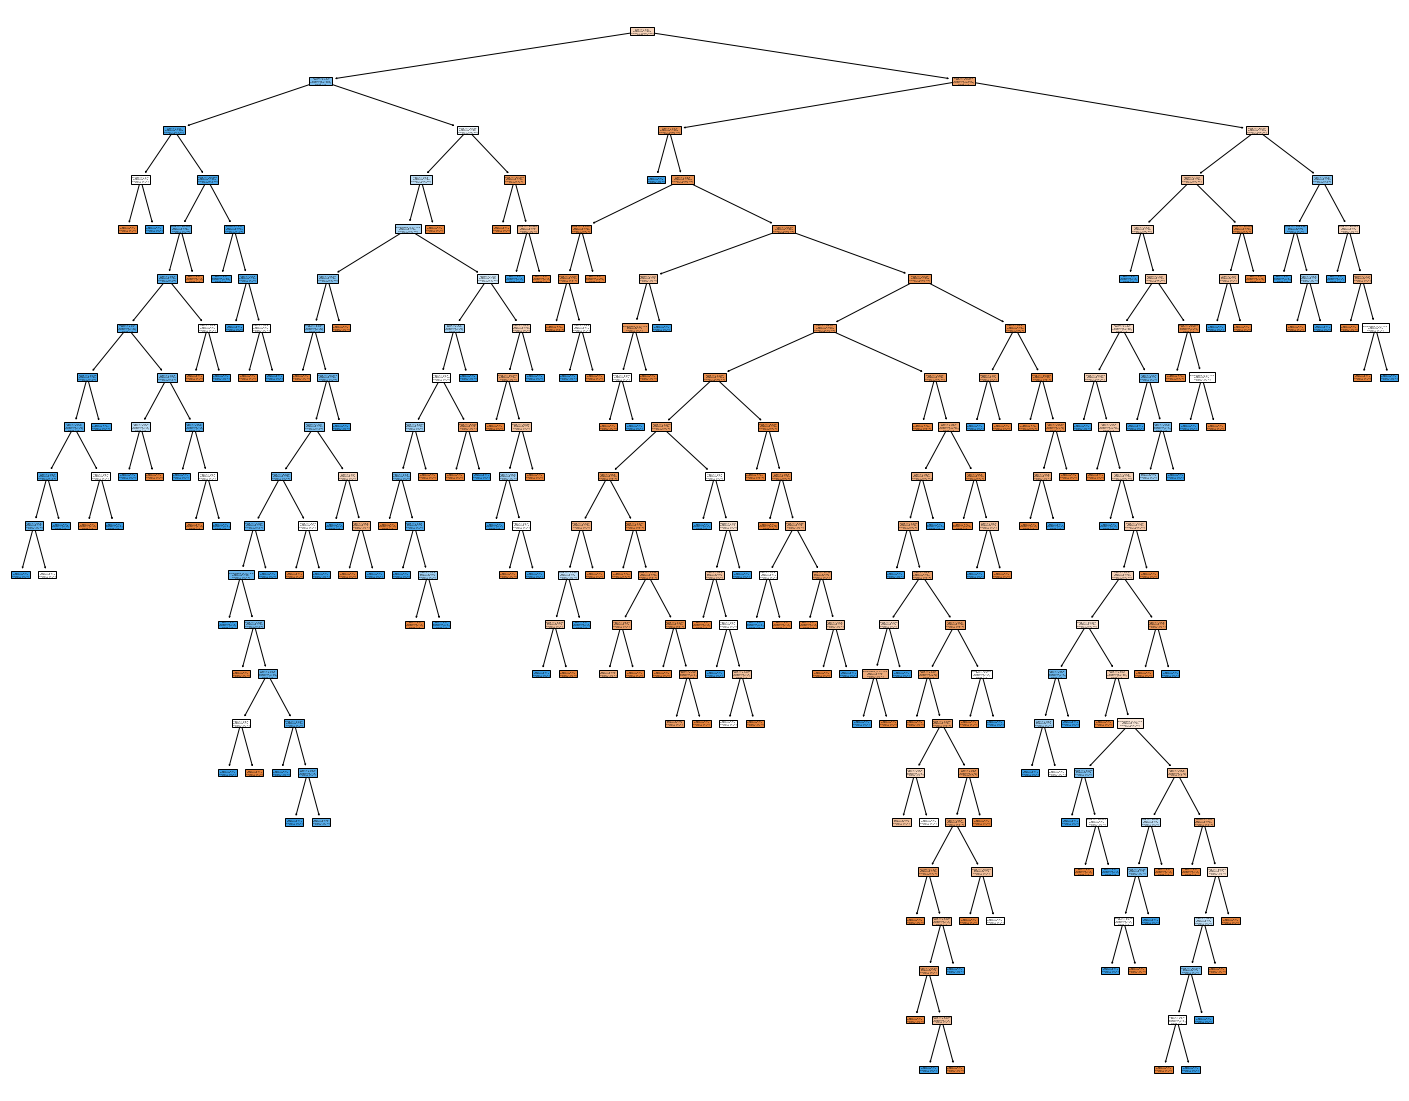

In [17]:
## visualize the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=feature_name, class_names=class_name,filled=True)

In [18]:
clf.score(X_train,y_train)

0.9839486356340289

In [19]:
clf.score(X_test,y_test)

0.7611940298507462

In [20]:
### hyperparameter tuning 

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [21]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [22]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'random'}

In [23]:
grid_search.best_score_

0.8233935483870967

In [24]:
## retrain the model with best parameters
clf = DecisionTreeClassifier(**{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'})
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       splitter='random')

In [25]:
clf.score(X_test,y_test)

0.7835820895522388

In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       171
           1       0.72      0.66      0.69        97

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [1]:
10*10


100